<a href="https://colab.research.google.com/github/aadityadamle/Admit-Prediction/blob/master/Copy_of_Admit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
# loading the data from csv file saved at the url
data = pd.read_csv("https://raw.githubusercontent.com/aadityadamle/Admit-Prediction/master/Admission_Predict_Ver1.1.csv")

In [3]:
# observing the data with the first 5 rows 
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# finding the no. of rows and columns in the dataset
data.shape

(500, 9)

In [5]:
# deleting the rows which have "na" values which means absence of data 
data = data.dropna()

In [6]:
# the shape of data is unchanged which means there are zero "na" and hence data.dropna() had no effect 
data.shape

(500, 9)

In [7]:
#Printing the list of columns
print(list(data.columns)) 

['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


In [8]:
# we have a default index and hence we don't need the "Serial No." column whose index is "0"
data.columns[0]

'Serial No.'

In [9]:
# hence we use drop function to delete the column
data.drop(data.columns[0],axis = 1, inplace = True)

In [10]:
# after deleting the column we again observe the dataset
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
# Viewing the final columns which we'll use for prediction
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [12]:
# Separating X from data
X = data.iloc[:,:7]

In [13]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [14]:
# Separating Y from data
Y = data.iloc[:,7:]

In [15]:
Y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [16]:
# Using train_test_split to split the data for tarining and testing as 0.9 and 0.1 respectively.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state = 0, shuffle = True, test_size = 0.1)

In [17]:
# Loading the classifier from the sklearn
classifier = LinearRegression()

In [18]:
# Fitting the classifier onto the training data
classifier.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

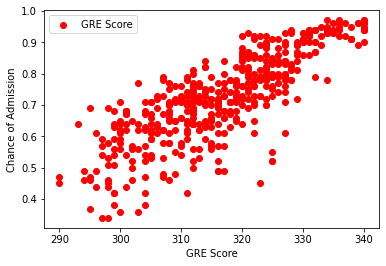

In [19]:
# Visualize the effect of GRE Score on chance of of getting an admit.  
plt.scatter(X_train["GRE Score"],Y_train, color = "red")
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admission")
plt.legend(["GRE Score"])
plt.show()

We see an increasing plot which shows higher GRE Score increases the chances of admission.

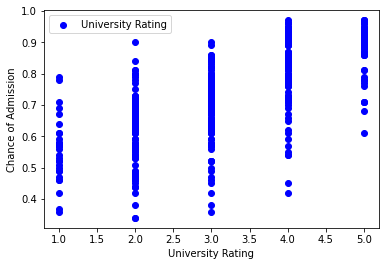

In [20]:
# Visulize the University Rating vs. Chance of Admission.   
plt.scatter(X_train["University Rating"],Y_train, color = "blue")
plt.xlabel("University Rating")
plt.ylabel("Chance of Admission")
plt.legend(["University Rating"])
plt.show()

This plot shows that Universities with average rating(2.0 - 4.0) have high no. of admissions signified by density of dots. This is because nobody applies in universities with low ratings and those with high ratings have low acceptance rate in general.

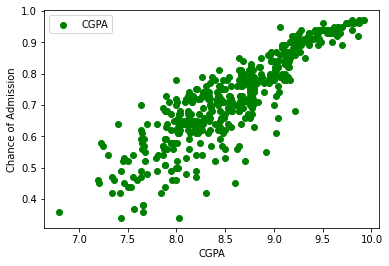

In [21]:
# Visualize the effect of CGPA on chance of of getting an admit. 
plt.scatter(X_train["CGPA"],Y_train, color = "green")
plt.xlabel("CGPA")
plt.ylabel("Chance of Admission")
plt.legend(["CGPA"])
plt.show()

We can clearly see that higher CGPA has higher chance of admission.

In [22]:
#Using the classifier to predict the test data and storing it in prediction_of_y array
prediction_of_Y = classifier.predict(X_test)

In [23]:
# Printing the first six predicted values
prediction_of_Y = np.round(prediction_of_Y, decimals = 3)
prediction_of_Y[:6]

array([[0.659],
       [0.831],
       [0.779],
       [0.877],
       [0.61 ],
       [0.648]])

In [24]:
# Comparision of predicted data(prediction_of_Y) and actual data(Y_test)
print(Y_test[:6])
df_predict = pd.DataFrame(prediction_of_Y)
df_predict = df_predict.rename(columns={0:"Predicted chance of admit"})
df_predict.head()

     Chance of Admit 
90               0.64
254              0.85
283              0.80
445              0.91
461              0.68
15               0.54


,Predicted chance of admit
0,0.659
1,0.831
2,0.779
3,0.877
4,0.610


From the above comparison we can observe that this model predicts the chances of admit with an error margin of 5%.

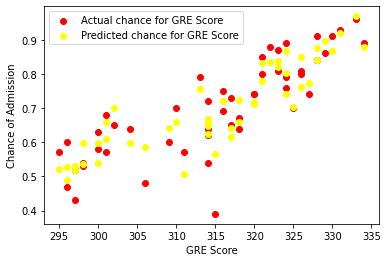

In [25]:
# Visualize the difference in graph for same parameter "GRE Score" for actual chance & prediction chance. 
plt.scatter(X_test["GRE Score"],Y_test, color = "red")
plt.scatter(X_test["GRE Score"], prediction_of_Y, color='yellow')
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admission")
plt.legend(["Actual chance for GRE Score","Predicted chance for GRE Score"])
plt.show()

In the above plot we understand how GRE Score parameter 
which is same produces different effect for predicted value than for actual value. The red dots at the bottom of the graph are outliers for our model.

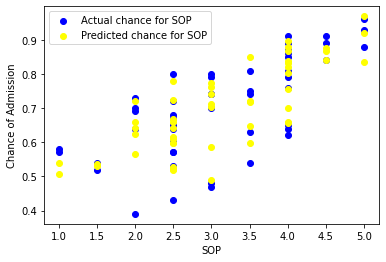

In [26]:
# Visualize the difference in graph for same parameter "SOP" for actual chance & prediction chance.
plt.scatter(X_test["SOP"],Y_test, color = "blue")
plt.scatter(X_test["SOP"], prediction_of_Y, color='yellow')
plt.xlabel("SOP")
plt.ylabel("Chance of Admission")
plt.legend(["Actual chance for SOP","Predicted chance for SOP"])
plt.show()

This graph is more evident than above. 
Consider SOP with rating 1.0: The actual chance of admission is near 60% and predictated chance is near 50%.
Consider SOP with rating 2.0: The actual chance of admission is lower the predited chance. And this continues for higher SOP as well.
Hence this model shows lower chance of admit than actual for low values of SOP and higher than actual chance for high values of SOP which is true as SOP is a pivotal factor in getting an admission.

In [27]:
# Comparing the predicted data with actual data to get the accuracy of the model
print('Accuracy: {:.2f}'.format(classifier.score(X_test, Y_test)))

Accuracy: 0.86


Now that we know that our model is substantially accurate, we must check it by adding arrbitary values or to be more correct real-world values specfied by the user. 
Let's assume that I have good GRE Score of 332, TOEFL Score of 107, good SOP and LOR of 4.5 and 4.0 respectively, my CGPA is 9.34 but I have not done any research. Let's see what are the chance of me getting an admit in a  5.0 rated university. 

In [28]:
# User - specified predictions. Adding my data to X_test dataset:
my_data = X_test.append(pd.Series([332, 107, 5, 4.5, 4.0, 9.34, 0], index = X_test.columns), ignore_index = True)

# Checking the datarame for our values:
print(my_data[-1:])

    GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
50      332.0        107.0                5.0  4.5   4.0  9.34       0.0


In [29]:
#Checking my chances of admission. # As the new record is saved at the end array the result will be the last value. 
my_chance = classifier.predict(my_data)
my_chance[-1]

array([0.84682967])

So this means I have a pretty good chance of around of getting an admit. Similarly you can check the admission chance for more than one record as well.Let's see how to do that.

In [30]:
# Evaluating admit chance for multiple user-defined records:
list_of_records = [pd.Series([309, 90, 4, 4, 3.5, 7.14, 0], index = X_test.columns),
                   pd.Series([300, 99, 3, 3.5, 3.5, 8.09, 0], index = X_test.columns),
                   pd.Series([304, 108, 4, 4, 3.5, 7.91, 0], index = X_test.columns),
                   pd.Series([295, 113, 5, 4.5, 4, 8.76, 1], index = X_test.columns)]
user_defined = X_test.append(list_of_records, ignore_index= True)
print(user_defined[-4:]) 

chances = classifier.predict(user_defined)
chances[-4:]

    GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
50      309.0         90.0                4.0  4.0   3.5  7.14       0.0
51      300.0         99.0                3.0  3.5   3.5  8.09       0.0
52      304.0        108.0                4.0  4.0   3.5  7.91       0.0
53      295.0        113.0                5.0  4.5   4.0  8.76       1.0


array([[0.48493208],
       [0.59780829],
       [0.61799131],
       [0.75518013]])

By observing the above results I can make an assumption that CGPA and Research are more important factors than GRE Score for getting an admit. Do you think I am wrong ? Try experimenting with the record values and check what the impact it has on the chance of admit. Maybe you will land on a different assumption of your own or may be you will prove me wrong.